In [347]:
import numpy as np
import matplotlib.pyplot as plt
import pmagpy.pmag as pmag
import pandas as pd

In [348]:
x = np.linspace(0,70,14) #will report paleolatitude values from 0-70 Million years ago, in 5 Myr increments 
vals = [] #storage for pmagpy data 
for i in x:
    data=['NA',33,-117,i] # North American plate, lat and lon of San Diego at 100 Ma (user inputs lat and long of site of interest)
    pmag.apwp(data, print_results = False) #change to true if you want to see the output
    vals.append(pmag.apwp(data))

In [349]:
df = pd.DataFrame(vals) #create a dataframe with the pmagpy data
df.columns = ['Age', 'Paleolat', 'Dec','Inc','Pole_lat','Pole_Long'] #rename the columns
Paleolat = df['Paleolat'] #call paleolat whenever you want all the paleolatitudes for some time frame

## Begin pulling in paleomag data

In [350]:
IAGA_database = pd.read_excel('IAGA_database.xlsx') #excel sheet with all pmag data. 0-70 Ma, all criteria

In [351]:
#picking appropriate ages
age_range = np.arange(0,70) #user inputs length of time

#The following lines go through the excel sheet, and drop any ages that are not within the specified age range
IAGA_database.drop(IAGA_database[IAGA_database['AGE'] < age_range[0]].index, inplace = True) #age
IAGA_database.drop(IAGA_database[IAGA_database['AGE'] > age_range[-1]].index, inplace = True) #age

#Criteria evaluation
pd.set_option("display.max_rows", None, "display.max_columns", None) # run this line if you want to see all the rows

#here, the user will input what sort of criteria they want on the paleomag data used to calculate Rc
#True = therm parameters, will only save the green bois
HeZ = IAGA_database[IAGA_database['IntM'] == '   HeZ       ' ].index
LTD_DHT_S = IAGA_database[IAGA_database['IntM'] == '   LTD-DHT-S ' ].index
M = IAGA_database[IAGA_database['IntM'] == '   M         ' ].index
MSPDp = IAGA_database[IAGA_database['IntM'] == '   MSPDp     ' ].index
ONR = IAGA_database[IAGA_database['IntM'] == '   ONR       ' ].index
S = IAGA_database[IAGA_database['IntM'] == '   S         ' ].index
ST = IAGA_database[IAGA_database['IntM'] == '   ST        ' ].index
SW = IAGA_database[IAGA_database['IntM'] == '   SW        ' ].index
TZ = IAGA_database[IAGA_database['IntM'] == '   TZ        ' ].index
Tminus = IAGA_database[IAGA_database['IntM'] == '   T-        ' ].index
W = IAGA_database[IAGA_database['IntM'] == '   W         ' ].index
WB = IAGA_database[IAGA_database['IntM'] == '   WB        ' ].index
WZ = IAGA_database[IAGA_database['IntM'] == '   WZ        ' ].index
Z = IAGA_database[IAGA_database['IntM'] == '   Z         ' ].index
Tv = IAGA_database[IAGA_database['IntM'] == '   Tv        ' ].index

therm = False
if therm == True: 
    #the following lines index string values (criteria from excel sheet). Spaces are indicative of how the names are stored in the excel sheet.
    #Delete these row indexes from dataFrame
    IAGA_database.drop(HeZ, inplace=True)
    IAGA_database.drop(LTD_DHT_S, inplace=True)
    IAGA_database.drop(M, inplace=True)
    IAGA_database.drop(MSPDp, inplace=True)
    IAGA_database.drop(ONR, inplace=True)
    IAGA_database.drop(S, inplace=True)
    IAGA_database.drop(ST, inplace=True)
    IAGA_database.drop(SW, inplace=True)
    IAGA_database.drop(TZ, inplace=True)
    IAGA_database.drop(Tv, inplace=True)
    IAGA_database.drop(Tminus, inplace=True)
    IAGA_database.drop(W, inplace=True)
    IAGA_database.drop(WB, inplace=True)
    IAGA_database.drop(WZ, inplace=True)
    IAGA_database.drop(Z, inplace=True)
#IAGA_database #slight problem with this: if you change True to False, you have to re-run the code from the beginning (probably something to do with the order these are written in, not refreshing things)\


In [352]:
index = IAGA_database.index
number_of_rows = len(index)
number_of_rows

2829

In [353]:
bin_1 = IAGA_database[IAGA_database['AGE'] <= 0.05]
bin_2 = IAGA_database[(IAGA_database['AGE'] <= 5) & (IAGA_database['AGE'] > 0.05)]
bin_3 = IAGA_database[(IAGA_database['AGE'] <= 10) & (IAGA_database['AGE'] > 5)]
bin_4 = IAGA_database[(IAGA_database['AGE'] <= 15) & (IAGA_database['AGE'] > 10)]
bin_5 = IAGA_database[(IAGA_database['AGE'] <= 20) & (IAGA_database['AGE'] > 15)]
bin_6 = IAGA_database[(IAGA_database['AGE'] <= 25) & (IAGA_database['AGE'] > 20)]
bin_7 = IAGA_database[(IAGA_database['AGE'] <= 30) & (IAGA_database['AGE'] > 25)]
bin_8 = IAGA_database[(IAGA_database['AGE'] <= 35) & (IAGA_database['AGE'] > 30)]
bin_9 = IAGA_database[(IAGA_database['AGE'] <= 40) & (IAGA_database['AGE'] > 35)]
bin_10 = IAGA_database[(IAGA_database['AGE'] <= 45) & (IAGA_database['AGE'] > 40)]
bin_11 = IAGA_database[(IAGA_database['AGE'] <= 50) & (IAGA_database['AGE'] > 45)]
bin_12 = IAGA_database[(IAGA_database['AGE'] <= 55) & (IAGA_database['AGE'] > 50)]
bin_13 = IAGA_database[(IAGA_database['AGE'] <= 60) & (IAGA_database['AGE'] > 55)]
bin_14 = IAGA_database[(IAGA_database['AGE'] <= 65) & (IAGA_database['AGE'] > 60)]
bin_15 = IAGA_database[(IAGA_database['AGE'] <= 70) & (IAGA_database['AGE'] > 65)]



In [354]:
means = []
median = []
bin_1 = bin_1[pd.to_numeric(bin_1['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_1['VDM'] = bin_1['VDM'].astype(float)
means.append((bin_1["VDM"].mean()))#calculates mean
median.append(bin_1['VDM'].median())
index_1 = bin_1.index
n_1 = len(index_1)
print('The number of data points from present to 0.05 Ma is', n_1)

bin_2 = bin_2[pd.to_numeric(bin_2['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_2['VDM'] = bin_2['VDM'].astype(float)
means.append((bin_2["VDM"].mean()))#calculates mean
median.append(bin_2['VDM'].median())
index_2 = bin_2.index
n_2 = len(index_2)
print('The number of data points from 0.05 to 5 Ma is', n_2)

bin_3 = bin_3[pd.to_numeric(bin_3['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_3['VDM'] = bin_3['VDM'].astype(float)
means.append((bin_3["VDM"].mean()))#calculates mean
median.append(bin_3['VDM'].median())
index_3 = bin_3.index
n_3 = len(index_3)
print('The number of data points from 5 to 10 Ma is', n_3)

bin_4 = bin_4[pd.to_numeric(bin_4['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_4['VDM'] = bin_4['VDM'].astype(float)
means.append((bin_4["VDM"].mean()))#calculates mean
median.append(bin_4['VDM'].median())
index_4 = bin_4.index
n_4 = len(index_4)
print('The number of data points from 10 to 15 Ma is', n_4)

bin_5 = bin_5[pd.to_numeric(bin_5['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_5['VDM'] = bin_5['VDM'].astype(float)
means.append((bin_5["VDM"].mean()))#calculates mean
median.append(bin_5['VDM'].median())
index_5 = bin_5.index
n_5 = len(index_5)
print('The number of data points from 15 to 20 Ma is', n_5)

bin_6 = bin_6[pd.to_numeric(bin_6['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_6['VDM'] = bin_6['VDM'].astype(float)
means.append((bin_6["VDM"].mean()))#calculates mean
median.append(bin_6['VDM'].median())
index_6 = bin_6.index
n_6 = len(index_6)
print('The number of data points from 20 to 25 Ma is', n_6)

bin_7 = bin_7[pd.to_numeric(bin_7['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_7['VDM'] = bin_7['VDM'].astype(float)
means.append((bin_7["VDM"].mean()))#calculates mean
median.append(bin_7['VDM'].median())
index_7 = bin_7.index
n_7 = len(index_7)
print('The number of data points from 25 to 30 Ma is', n_7)

bin_8 = bin_8[pd.to_numeric(bin_8['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_8['VDM'] = bin_8['VDM'].astype(float)
means.append((bin_8["VDM"].mean()))#calculates mean
median.append(bin_8['VDM'].median())
index_8 = bin_8.index
n_8 = len(index_8)
print('The number of data points from 30 to 35 Ma is', n_8)

bin_9 = bin_9[pd.to_numeric(bin_9['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_9['VDM'] = bin_9['VDM'].astype(float)
means.append((bin_9["VDM"].mean()))#calculates mean
median.append(bin_9['VDM'].median())
index_9 = bin_9.index
n_9 = len(index_9)
print('The number of data points from 35 to 40 Ma is', n_9)

bin_10 = bin_10[pd.to_numeric(bin_10['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_10['VDM'] = bin_10['VDM'].astype(float)
means.append((bin_10["VDM"].mean()))#calculates mean
median.append(bin_10['VDM'].median())
index_10 = bin_10.index
n_10 = len(index_10)
print('The number of data points from 40 to 45 Ma is', n_10)

bin_11 = bin_11[pd.to_numeric(bin_11['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_11['VDM'] = bin_11['VDM'].astype(float)
means.append((bin_11["VDM"].mean()))#calculates mean
median.append(bin_11['VDM'].median())
index_11 = bin_11.index
n_11 = len(index_11)
print('The number of data points from 45 to 50 Ma is', n_11)

bin_12 = bin_12[pd.to_numeric(bin_12['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_12['VDM'] = bin_12['VDM'].astype(float)
means.append((bin_12["VDM"].mean()))#calculates mean
median.append(bin_12['VDM'].median())
index_12 = bin_12.index
n_12 = len(index_12)
print('The number of data points from 50 to 55 Ma is', n_12)

bin_13 = bin_13[pd.to_numeric(bin_13['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_13['VDM'] = bin_13['VDM'].astype(float)
means.append((bin_13["VDM"].mean()))#calculates mean
median.append(bin_13['VDM'].median())
index_13 = bin_13.index
n_13 = len(index_13)
print('The number of data points from 55 to 60 Ma is', n_13)

bin_14 = bin_14[pd.to_numeric(bin_14['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_14['VDM'] = bin_14['VDM'].astype(float)
means.append((bin_14["VDM"].mean()))#calculates mean
median.append(bin_14['VDM'].median())
index_14 = bin_14.index
n_14 = len(index_14)
print('The number of data points from 60 to 65 Ma is', n_14)

bin_15 = bin_15[pd.to_numeric(bin_15['VDM'], errors='coerce').notnull()] #dropping the &nbsp vals  
bin_15['VDM'] = bin_15['VDM'].astype(float)
means.append((bin_15["VDM"].mean()))#calculates mean
median.append(bin_15['VDM'].median())
index_15 = bin_15.index
n_15 = len(index_15)
print('The number of data points from 65 to 70 Ma is', n_15)

means


The number of data points from present to 0.05 Ma is 11
The number of data points from 0.05 to 5 Ma is 1722
The number of data points from 5 to 10 Ma is 174
The number of data points from 10 to 15 Ma is 201
The number of data points from 15 to 20 Ma is 86
The number of data points from 20 to 25 Ma is 17
The number of data points from 25 to 30 Ma is 48
The number of data points from 30 to 35 Ma is 69
The number of data points from 35 to 40 Ma is 37
The number of data points from 40 to 45 Ma is 31
The number of data points from 45 to 50 Ma is 22
The number of data points from 50 to 55 Ma is 16
The number of data points from 55 to 60 Ma is 43
The number of data points from 60 to 65 Ma is 112
The number of data points from 65 to 70 Ma is 55


[5.654545454545455,
 6.613356562137046,
 6.201724137931032,
 4.833830845771144,
 4.130232558139533,
 4.235294117647059,
 5.53125,
 3.6797101449275353,
 4.124324324324325,
 5.358064516129031,
 8.299999999999999,
 4.293749999999999,
 7.167441860465116,
 5.703571428571431,
 4.281818181818181]

## Calculate Rc

[0.3826282918136354,
 0.4475085300606902,
 0.4196544412404397,
 0.3270926822149229,
 0.2794820275507058,
 0.2865912683151118,
 0.3742852110938244,
 0.2489963549574309,
 0.27908223283148015,
 0.362566202661909,
 0.5616392772119758,
 0.2905468248830026,
 0.4850020320446371,
 0.3859457511650284]

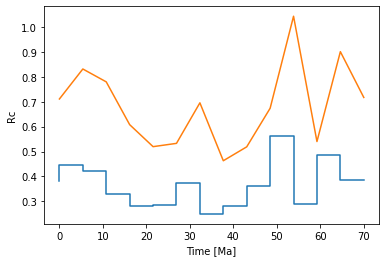

In [355]:
# Fixed values
#problem: we haven't imported more data from present - 0.05 Ma, so the magnetic moment for that interval is jank
#this means the Rc is jank too 
M0 = 7.95 #[*10^22 Am^2], per Katie. constant, magnetic moment today for reference field.
Rc = []
temp = []
theta = 20 #user input, but then our code has to translate this into paleolatitudes over some timescale. at each time step (e.g., 5 myr, this will have to update based on some paleolatitude record - gplates?) 
for i in range(len(Paleolat)):
    Rc_calc = (means[i]/M0)*((6.89901*np.cos(theta)) - (103.241*np.cos(theta)**2) + (522.061*np.cos(theta)**3) - (1152.15*np.cos(theta)**4) + (1189.18*np.cos(theta)**5) - (448.004*np.cos(theta)**6))  #balco 2007, lifton scheme, [unitless]
    Rc.append(Rc_calc)
    temp.append(means[i]/M0)
plt.step(x,Rc)
plt.xlabel('Time [Ma]')
plt.ylabel('Rc')
plt.plot(x,temp)
Rc

Production rate

In [23]:
# Fixed values
P0 = 103 #at/g/yr, 3He in zircon, Amidon & Farley (2011) 133 in apatite #constant production rate for a specific nuclide [at/g/yr]
lam = 170 #g/cm^2, yokoyama et al #attenuation coeffcient, constant [m]

# User inputs
Z = 241.3 #user input, subsurface depth of sample, constant [m]
P_list = []
for i in range(len(Rc)):
    P = Rc[i]*P0*np.e**(-Z/lam) # yokoyama et al 1977. [at/g/yr]
    P_list.append(P)
P_list

[94.9021617799678,
 231.76899506677708,
 75.0408145108086,
 12.06754777569762,
 13.211277689814978,
 86.50407971961985,
 178.22647269354047,
 5.545005001036004,
 129.58303771605114,
 28.533067377064402,
 295.06754812077963,
 83.29803370262228,
 1.1452845248603478,
 0.9630456674052363]

## Production Rates Calculation
- The following cells (will) take in the Rc vector above, and then calculates a corresponding production rate. 
- As of now (5/4), we are using arbitrary Rc values to test whether the code actually works or not
- Our Rc vector is also only ~12-14 elements long (based on how we're binning paleomag data), whereas the code requires it to be 200 units long (based on the energy spectrum involved in the actual integration). 
- Some solutions: Make our Rc vector 200 units long by having it repeat each bin N number of times, but not sure how legit that would be?

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Natoms = pd.read_csv('Natoms', sep=" ", header=None) #this is just a single number, from Nat's code
Onx3HeT = pd.read_csv('Onx3HeT', header = None)
#csv = np.genfromtxt ('Onx3HeT')
 #This is an array len = 200, cross sections apparently from pers. comm w/N Nat
Sinx3HeT = pd.read_csv('Sinx3HeT', header=None) #Same as above
a_values = pd.read_csv('a_values', header=None)
b_values = pd.read_csv('b_values', header=None)
basic_spectrum = pd.read_csv('basic_spectrum',header=None)
c_values = pd.read_csv('c_values', header=None)
ground_level_spectrum = pd.read_csv('ground_level_spectrum',header=None)
thermal_neutron_spectrum = pd.read_csv('thermal_neutron_spectrum',header=None)
a_values.columns = ['variable','values']
#a_values.iloc[0]['values']
b_values.columns = ['variable','values']
basic_spectrum.columns = ['variable', 'values']
c_values.columns = ['variable', 'values']
ground_level_spectrum.columns = ['variable' , 'values']
thermal_neutron_spectrum.columns = ['variable' , 'values']
df = np.logspace(0,5.3010,200)
E = pd.DataFrame(df)
E.columns = ['Energy']
#Energy spectrum [MeV]. From Sato & Nita (2006 or 2008, one has neutrons one has protons)
#Energy spectrum doesn't start exactly at 0 because we were having problems with division by 0. 
E

,Energy
0,1.000000
1,1.063257
2,1.130515
3,1.202028
4,1.278064
...,...
195,156475.820022
196,166373.988123
197,176898.283197
198,188088.312069


In [305]:
#Energy spectrum [MeV]. From Sato & Nita (2006 or 2008, one has neutrons one has protons)
#Energy spectrum doesn't start exactly at 0 because we were having problems with division by 0. 
hold = []
hold1 = []
#x = h*1.019716. In Nat's code, this is one of the first lines. It takes in h (atmospheric pressure) and converts it into atmospheric depth
#in units of g/cm2
#not sure if h is a list of atmospheric pressures, or just a single number? So we're sticking to a single number, given below (also from Nat's code)
w = 0.2; # water content, from 0-1
s = 1700; #honestly, not sure what s is
Rc = np.linspace(12,12.1,200) #in Nat's code, he comments Rc as a single number (12). Not really sure why
#Here, We've just made it the same length as the energy spectrum, using some reasonable values of Rc.
x = 1030; #standard pressure
Et = 2.5e-8; #thermal neutron energy in MeV

##Integrated neutron flux <15 MeV

smin = 400; #units of MV
smax = 1200; #units of MV

# Ground-Level Spectrum
g3 = 10**(ground_level_spectrum.iloc[0]['values'] + ground_level_spectrum.iloc[1]['values']/(w + ground_level_spectrum.iloc[2]['values']))
g5 = ground_level_spectrum.iloc[3]['values'] + (ground_level_spectrum.iloc[4]['values']*w) + ground_level_spectrum.iloc[5]['values']*(w**2);
fG = 10**(ground_level_spectrum.iloc[6]['values'] + ground_level_spectrum.iloc[7]['values']*np.log10(E/g3)*(1-np.tanh(ground_level_spectrum.iloc[8]['values']*np.log10(E/g5))))

#Thermal Neutron Spectrum
g6 = (thermal_neutron_spectrum.iloc[0]['values'] + thermal_neutron_spectrum.iloc[1]['values']*np.exp(-thermal_neutron_spectrum.iloc[2]['values']*w))/(1 + thermal_neutron_spectrum.iloc[3]['values']*np.exp(-thermal_neutron_spectrum.iloc[4]['values']*w))

PhiT = g6*((E/Et)**2)*np.exp(-E/Et)

# Total Ground-Level Flux

PhiB = np.zeros((1,len(E)))
PhiG = np.zeros((1,len(E)))
PhiGMev = np.zeros((1,len(E)))
p10n = np.zeros((1,len(E)))
p14n = np.zeros((1,len(E)))
p26n = np.zeros((1,len(E)))
p3n = np.zeros((1,len(E)))
p36Can = np.zeros((1,len(E)))
p36Kn = np.zeros((1,len(E)))
p36Tin = np.zeros((1,len(E)))
p36Fen = np.zeros((1,len(E)))

for a in range(len(Rc)):
    a1min = b_values.iloc[0]['values'] + b_values.iloc[2]['values']*Rc[a] + b_values.iloc[4]['values']/(1 + np.exp((Rc[a] - b_values.iloc[6]['values'])/b_values.iloc[8]['values']))
    a1max = b_values.iloc[1]['values'] + b_values.iloc[3]['values']*Rc[a] + b_values.iloc[5]['values']/(1 + np.exp((Rc[a] - b_values.iloc[7]['values'])/b_values.iloc[9]['values']))
    a2min = b_values.iloc[10]['values'] + b_values.iloc[12]['values']*Rc[a] + b_values.iloc[14]['values']/(1 + np.exp((Rc[a] - b_values.iloc[16]['values'])/b_values.iloc[18]['values']))
    a2max = b_values.iloc[11]['values'] + b_values.iloc[13]['values']*Rc[a] + b_values.iloc[15]['values']/(1 + np.exp((Rc[a] - b_values.iloc[17]['values'])/b_values.iloc[19]['values']))
    a3min = b_values.iloc[20]['values'] + b_values.iloc[22]['values']*Rc[a] + b_values.iloc[24]['values']/(1 + np.exp((Rc[a] - b_values.iloc[26]['values'])/b_values.iloc[28]['values']))
    a3max = b_values.iloc[21]['values'] + b_values.iloc[23]['values']*Rc[a] + b_values.iloc[25]['values']/(1 + np.exp((Rc[a] - b_values.iloc[27]['values'])/b_values.iloc[29]['values']))
    a4min = b_values.iloc[30]['values'] + b_values.iloc[32]['values']*Rc[a] + b_values.iloc[34]['values']/(1 + np.exp((Rc[a] - b_values.iloc[36]['values'])/b_values.iloc[38]['values']))
    a4max = b_values.iloc[31]['values'] + b_values.iloc[33]['values']*Rc[a] + b_values.iloc[35]['values']/(1 + np.exp((Rc[a] - b_values.iloc[37]['values'])/b_values.iloc[39]['values']))

    a5 = basic_spectrum.iloc[0]['values'] + basic_spectrum.iloc[1]['values']*Rc[a] + basic_spectrum.iloc[2]['values']/(1 + np.exp((Rc[a] - basic_spectrum.iloc[3]['values'])/basic_spectrum.iloc[4]['values']));
    a9 = basic_spectrum.iloc[5]['values'] + basic_spectrum.iloc[6]['values']*Rc[a] + basic_spectrum.iloc[7]['values']/(1 + np.exp((Rc[a] - basic_spectrum.iloc[8]['values'])/basic_spectrum.iloc[9]['values']));
    a10 = basic_spectrum.iloc[10]['values'] + basic_spectrum.iloc[11]['values']*Rc[a] + basic_spectrum.iloc[12]['values']/(1 + np.exp((Rc[a] - basic_spectrum.iloc[13]['values'])/basic_spectrum.iloc[14]['values']));
    a11 = basic_spectrum.iloc[15]['values'] + basic_spectrum.iloc[16]['values']*Rc[a] + basic_spectrum.iloc[17]['values']/(1 + np.exp((Rc[a] - basic_spectrum.iloc[18]['values'])/basic_spectrum.iloc[19]['values']));

    b5 = b_values.iloc[40]['values'] + b_values.iloc[41]['values']*Rc[a] + b_values.iloc[42]['values']/(1 + np.exp((Rc[a] - b_values.iloc[43]['values'])/b_values.iloc[44]['values']))
    b6 = b_values.iloc[45]['values'] + b_values.iloc[46]['values']*Rc[a] + b_values.iloc[47]['values']/(1 + np.exp((Rc[a] - b_values.iloc[48]['values'])/b_values.iloc[49]['values']))

    c4 = a5 + a_values.iloc[0]['values']*x/(1 + a_values.iloc[1]['values']*np.exp(a_values.iloc[2]['values']*x)) #lethargy^-1
    c12 = a9*(np.exp(-a10*x) + a11*np.exp(-a_values.iloc[3]['values']*x)) # MeV

    PhiLmin = a1min*(np.exp(-a2min*x) - a3min*np.exp(-a4min*x)) #length of Rc
    PhiLmax = a1max*(np.exp(-a2max*x) - a3max*np.exp(-a4max*x)) #length of Rc

    f3 = b5 + (b6*x)
    f2 = (PhiLmin - PhiLmax)/(smin**f3 - smax**f3)
    f1 = PhiLmin - f2*smin**f3;
    
    PhiL = f1 + (f2*s**f3)
    
    PhiB = (c_values.iloc[0]['values']*(E/c_values.iloc[1]['values'])**c_values.iloc[2]['values'])*np.exp(-E/c_values.iloc[1]['values']) + c4*np.exp((-(np.log10(E) - np.log10(c_values.iloc[3]['values']))**2)/(2*(np.log10(c_values.iloc[4]['values']))**2)) + c_values.iloc[5]['values']*np.log10(E/c_values.iloc[6]['values'])*(1 + np.tanh(c_values.iloc[7]['values']*np.log10(E/c_values.iloc[8]['values'])))*(1 - np.tanh(c_values.iloc[9]['values']*np.log10(E/c12)))
    
    PhiG = PhiL*(PhiB*fG + PhiT)
    df2 = PhiG/E
    PhiGMev = pd.DataFrame(df2)
    a = PhiGMev.to_numpy()
    b = E.to_numpy()
    c = Onx3HeT.to_numpy()
    d = Sinx3HeT.to_numpy()
    PhiGMev_array = np.reshape(a, 200)
    E_array = np.reshape(b, 200)
    Onx3HeT_array = np.reshape(c,200)
    Sinx3HeT_array = np.reshape(d,200)
    p3n = (np.trapz(PhiGMev_array*Onx3HeT_array,E_array) + np.trapz(PhiGMev_array*(Sinx3HeT_array/2), E_array))*(2.00600000000000e22*1e-27*3.1536e7)
p3n
    
    
    
    
    
    

40.95534083581392

# How numpy.trapz works
## numpy.trapz(y, x=None, dx=1.0, axis=-1)[source]
Integrate along the given axis using the composite trapezoidal rule.

Integrate y (x) along given axis.

Parameters
y: array_like
Input array to integrate.

x: array_like, optional
The sample points corresponding to the y values. If x is None, the sample points are assumed to be evenly spaced dx apart. The default is None.

dx: scalar, optional
The spacing between sample points when x is None. The default is 1.

ax: isint, optional
The axis along which to integrate.

Returns
trapzfloat
Definite integral as approximated by trapezoidal rule.

## Nat's Matlab Script
function N = Neutrons(h,Rc,s,w,consts,nuclide)

% Sato et al. (2008) Neutron Spectrum
% Analytical Function Approximation (PARMA)
% Implemented in MATLAB by Nat Lifton, 2013
% Purdue University, nlifton@purdue.edu

% Copyright 2013, Purdue University
% All rights reserved
% Developed in part with funding from the National Science Foundation.
%
% This program is free software; you can redistribute it and/or modify
% it under the terms of the GNU General Public License, version 3,
% as published by the Free Software Foundation (https://urldefense.proofpoint.com/v2/url?u=http-3A__www.fsf.org&d=DwIG-g&c=sJ6xIWYx-zLMB3EPkvcnVg&r=-ISFeLc9OBPOASaQVb68asJMg_-3XpxVSS4K_An0R8o&m=Dsf9fMWX1aZnLZnAOLb5km0RHNdUvAiN6NryCYSrej8&s=7rTIy5rxi9ii0ltjB2gRBfy0VPl-Ovr8svIFqw8aJvg&e= ).

x = h.*1.019716; % Convert pressure (hPa) to atm depth (g/cm2)

% E = logspace(-8,5,1000);
E = logspace(0,5.3010,200);
% E = [1.1295 11.295 112.95 1129.5 11295];

% Flatten low rigidities.

lowRc = find(Rc < 1.0);
Rc(lowRc) = 1.0 + zeros(size(lowRc));

%nflux = zeros(length(Rc));

%w = 0.2; % water content, from 0-1
%s = 1700;
%Rc = 12;
%x = 1030;
Et = 2.5e-8; % Thermal Neutron Energy in MeV

#Integrated neutron flux <15 MeV

smin = 400; %units of MV
smax = 1200; %units of MV

a6 = 1.8882e-4;
a7 = 4.4791e-1;
a8 = 1.4361e-3;
a12 = 1.4109e-2;


a6 = 1.8882e-4;
a7 = 4.4791e-1;
a8 = 1.4361e-3;
a12 = 1.4109e-2;

b11min = 2.5702e1;
b11max = -6.9221;
b12min = -5.0931e-1;
b12max = 1.1336;
b13min= 7.4650;
b13max = 2.6961e1;
b14min = 1.2313e1;
b14max = 1.1746e1;
b15min = 1.0498;
b15max = 2.6171;
b21min = 6.5143e-3;
b21max = 5.3211e-3;
b22min = 3.3511e-5;
b22max = 8.4899e-5;
b23min = 9.4415e-4;
b23max = 2.0704e-3;
b24min = 1.2088e1;
b24max = 1.1714e1;
b25min = 2.7782;
b25max = 3.8051;
b31min = 9.8364e-1;
b31max = 9.7536e-1;
b32min = 1.4964e-4;
b32max = 6.4733e-4;
b33min = -7.3249e-1;
b33max = -2.2750e-1;
b34min = -1.4381;
b34max = 2.0713;
b35min = 2.7448;
b35max = 2.1689;
b41min = 8.8681e-3;
b41max = 9.1435e-3;
b42min = -4.3322e-5;
b42max = -6.4855e-5;
b43min = 1.7293e-2;
b43max = 5.8179e-3;
b44min = -1.0836;
b44max = 1.0168;
b45min = 2.6602;
b45max = 2.4504;

b121 = 9.31e-1;
b122 = 3.70e-2;
b123 = -2.02;
b124 = 2.12;
b125 = 5.34;
b131 = 6.67e-4;
b132 = -1.19e-5;
b133 = 1.00e-4;
b134 = 1.45;
b135 = 4.29;

% Basic Spectrum

b51 = 9.7337e-4;
b52 = -9.6635e-5;
b53 = 1.2121e-2;
b54 = 7.1726;
b55 = 1.4601;
b91 = 5.7199e2;
b92 = 7.1293;
b93 = -1.0703e2;
b94 = 1.8538;
b95 = 1.2142;
b101 = 6.8552e-4;
b102 = 2.7136e-5;
b103 = 5.7823e-4;
b104 = 8.8534;
b105 = 3.6417;
b111 = -5.0800e-1;
b112 = 1.4783e-1;
b113 = 1.0068;
b114 = 9.1556;
b115 = 1.6369;

c1 = 2.3555e-1; % lethargy^-1
c2 = 2.3779; % MeV
c3 = 7.2597e-1;
c5 = 1.2391e2; % MeV
c6 = 2.2318; % MeV
c7 = 1.0791e-3; % lethargy^-1
c8 = 3.6435e-12; % MeV
c9 = 1.6595;
c10 = 8.4782e-8; % MeV
c11 = 1.5054;

% Ground-Level Spectrum

h31 = -2.5184e1;
h32 = 2.7298;
h33 = 7.1526e-2;
h51 = 3.4790e-1;
h52 = 3.3493;
h53 = -1.5744;

g1 = -0.023499;
g2 = -0.012938;
g3 = 10.^(h31 + h32./(w + h33));
g4 = 9.6889e-1;
g5 = h51 + h52.*w + h53.*(w.^2);

fG = 10.^(g1 + g2.*log10(E./g3).*(1-tanh(g4.*log10(E./g5))));

% Thermal Neutron Spectrum

h61 = 1.1800e-1;
h62 = 1.4438e-1;
h63 = 3.8733;
h64 = 6.5298e-1;
h65 = 4.2752e1;

g6 = (h61 + h62.*exp(-h63.*w))./(1 + h64.*exp(-h65.*w));

PhiT = g6.*((E./Et).^2).*exp(-E./Et);

% Total Ground-Level Flux

PhiB = zeros(1,length(E));
PhiG = zeros(1,length(E));
PhiGMev = zeros(1,length(E));
p10n = zeros(1,length(E));
p14n = zeros(1,length(E));
p26n = zeros(1,length(E));
p3n = zeros(1,length(E));
p36Can = zeros(1,length(E));
p36Kn = zeros(1,length(E));
p36Tin = zeros(1,length(E));
p36Fen = zeros(1,length(E));

for a = 1:length(Rc)
    
    a1min = b11min + b12min.*Rc(a) + b13min./(1 + exp((Rc(a) - b14min)./b15min));
    a1max = b11max + b12max.*Rc(a) + b13max./(1 + exp((Rc(a) - b14max)./b15max));
    a2min = b21min + b22min.*Rc(a) + b23min./(1 + exp((Rc(a) - b24min)./b25min));
    a2max = b21max + b22max.*Rc(a) + b23max./(1 + exp((Rc(a) - b24max)./b25max));
    a3min = b31min + b32min.*Rc(a) + b33min./(1 + exp((Rc(a) - b34min)./b35min));
    a3max = b31max + b32max.*Rc(a) + b33max./(1 + exp((Rc(a) - b34max)./b35max));
    a4min = b41min + b42min.*Rc(a) + b43min./(1 + exp((Rc(a) - b44min)./b45min));
    a4max = b41max + b42max.*Rc(a) + b43max./(1 + exp((Rc(a) - b44max)./b45max));
    
    a5 = b51 + b52.*Rc(a) + b53./(1 + exp((Rc(a) - b54)./b55));
    a9 = b91 + b92.*Rc(a) + b93./(1 + exp((Rc(a) - b94)./b95));
    a10 = b101 + b102.*Rc(a) + b103./(1 + exp((Rc(a) - b104)./b105));
    a11 = b111 + b112.*Rc(a) + b113./(1 + exp((Rc(a) - b114)./b115));
    
    b5 = b121 + b122.*Rc(a) + b123./(1 + exp((Rc(a) - b124)./b125));
    b6 = b131 + b132.*Rc(a) + b133./(1 + exp((Rc(a) - b134)./b135));

    c4 = a5 + a6.*x./(1 + a7.*exp(a8.*x)); % lethargy^-1
    c12 = a9.*(exp(-a10.*x) + a11.*exp(-a12.*x)); % MeV

    PhiLmin = a1min.*(exp(-a2min.*x) - a3min.*exp(-a4min.*x)); %length of Rc
    PhiLmax = a1max.*(exp(-a2max.*x) - a3max.*exp(-a4max.*x)); %length of Rc
    
    f3 = b5 + b6.*x;
    f2 = (PhiLmin - PhiLmax)./(smin.^f3 - smax.^f3);
    f1 = PhiLmin - f2.*smin.^f3;

    PhiL = f1 + f2.*s(a).^f3;

    PhiB = (c1.*(E./c2).^c3).*exp(-E./c2) + c4.*exp((-(log10(E) - log10(c5)).^2)./(2.*(log10(c6)).^2))
    + c7.*log10(E./c8).*(1 + tanh(c9.*log10(E./c10))).*(1 - tanh(c11.*log10(E./c12)));

    PhiG = PhiL.*(PhiB.*fG + PhiT);
    PhiGMev = PhiG./E;
    
    clipindex = find(E <= 1, 1, 'last' ); %Make sure the clip index is consistent with the definition of E above
    
    if nuclide == 3
        N.P3n(a) = (trapz(E(clipindex:end),PhiGMev(clipindex:end).*consts.OnxHe3T(clipindex:end)) + trapz(E(clipindex:end),PhiGMev(clipindex:end).*consts.SinxHe3T(clipindex:end)./2)).*consts.Natoms3.*1e-27.*3.1536e7;    
    elseif nuclide == 10    
        N.P10n(a) = (trapz(E(clipindex:end),PhiGMev(clipindex:end).*consts.O16nxBe10(clipindex:end)) + trapz(E(clipindex:end),PhiGMev(clipindex:end).*consts.SinxBe10(clipindex:end)./2)).*consts.Natoms10.*1e-27.*3.1536e7;    
    elseif nuclide == 14      
        N.P14n(a) = (trapz(E(clipindex:end),PhiGMev(clipindex:end).*consts.O16nn2pC14(clipindex:end))+ trapz(E(clipindex:end),PhiGMev(clipindex:end).*consts.SinxC14(clipindex:end)./2)).*consts.Natoms14.*1e-27.*3.1536e7;    
    elseif nuclide == 26  
        N.P26n(a) = trapz(E(clipindex:end),PhiGMev(clipindex:end).*consts.SinxAl26(clipindex:end)).*consts.Natoms26.*1e-27.*3.1536e7;
    else
        N.nflux(a) = trapz(E(clipindex:end),PhiGMev(clipindex:end));
    end  
    
end    

N.E = E;
% Plot it

% figure;clf;
% semilogx(E,PhiG);
% 
% figure;clf;
% loglog(E,PhiGMev); hold on;
% ylim([0 .1]);
